# Local Heat Transfer Coefficient Calculation of Flat Plate


Pr = 0.6972872583760671
Viscosity Sutherland´s Law:  1.8460015185931454e-05
Kinematic Viscosity:  1.5688963313461507e-05
Density:  1.176624281484062


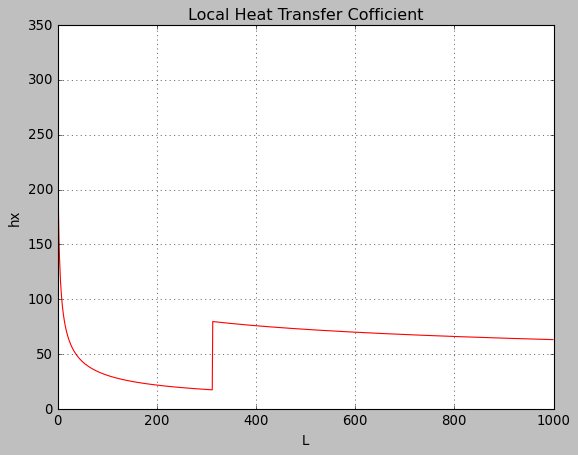

In [15]:
from operator import index
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

local_htc = list()

V = 25
L = 1000
T = 300
P = 101325
cp = 1.007
k  = 0.0263
alpha = 22.5 * (10**(-6))

rho  = P/(287.05*T)
mu   = (1.458 *10**(-6)) * ((T**(3/2)) / (T + 110.4))
nu   = mu / rho
Pr   = nu  / alpha
print("Pr =", Pr)
print ("Viscosity Sutherland´s Law: ", mu)
print ("Kinematic Viscosity: ", nu)
print ("Density: ", rho)

# local heat transfer coefficient
for L in range(1, L+1, 1):
    Re   = V * (L * 0.001) * rho / mu


    # laminar flow
    if Re <= 5 * (10**5) and Pr > 0.6:
        hx = (k / (L * 0.001)) * 0.332 * (Re ** 0.5) * (Pr ** (1/3))
        local_htc.append(hx)
       
                
    # turbulent flow 
    elif 5 * (10**5) <= Re <= (10**8) and 0.6 <= Pr <= 60:
        hx = (k / (L * 0.001)) * 0.0296 * (Re ** 0.8) * (Pr ** (1/3))
        local_htc.append(hx)
    
       
x1 = np.arange(0, L)
y1 = local_htc

plt.title("Local Heat Transfer Cofficient")
plt.xlabel("L")
plt.ylabel("hx")
plt.plot(x1, y1, color ="red")
plt.grid()    
plt.show()